In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64


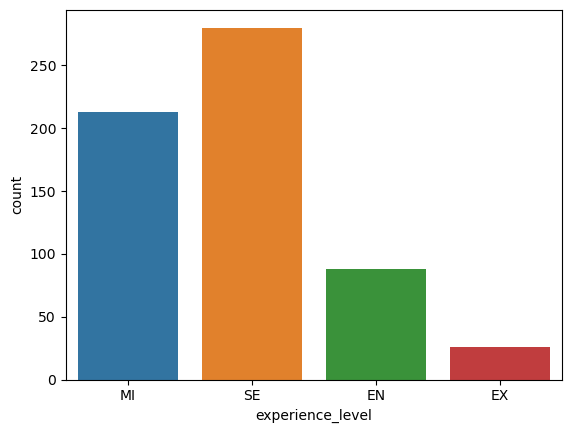

In [6]:
# Distribution of Experience Level

print(df['experience_level'].value_counts())
sns.countplot(x='experience_level', data=df);

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Big Data Engineer'),
  Text(3, 0, 'Product Data Analyst'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Data Analyst'),
  Text(6, 0, 'Lead Data Scientist'),
  Text(7, 0, 'Business Data Analyst'),
  Text(8, 0, 'Lead Data Engineer'),
  Text(9, 0, 'Lead Data Analyst'),
  Text(10, 0, 'Data Engineer'),
  Text(11, 0, 'Data Science Consultant'),
  Text(12, 0, 'BI Data Analyst'),
  Text(13, 0, 'Director of Data Science'),
  Text(14, 0, 'Research Scientist'),
  Text(15, 0, 'Machine Learning Manager'),
  Text(16, 0, 'Data Engineering Manager'),
  Text(17, 0, 'Machine Learning Infrastructure Engineer'),
  Text(18, 0, 'ML Engineer'),
  Text(19, 0, 'AI Scientist'),
  Text(20, 

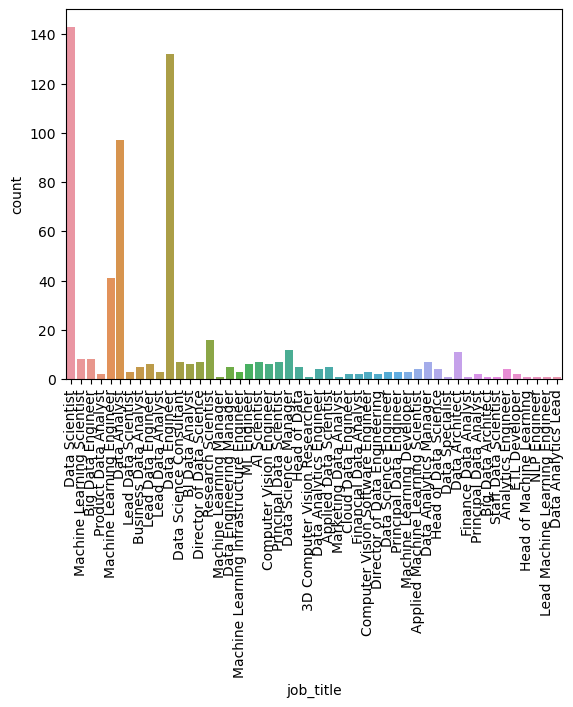

In [7]:
# Distribution Job Title

print(df['job_title'].value_counts())
sns.countplot(x='job_title', data=df)
plt.xticks(rotation=90)

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


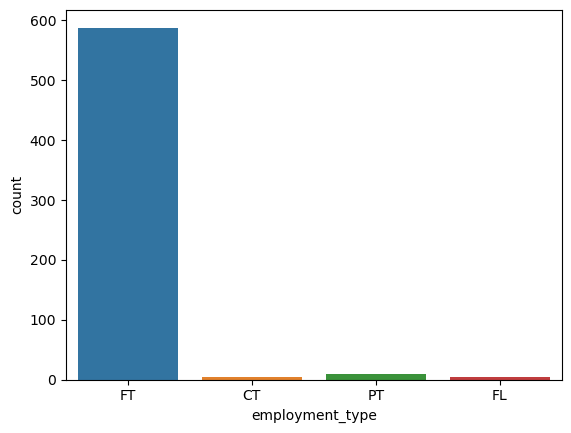

In [8]:
# Distribution employment Type

print(df['employment_type'].value_counts())
sns.countplot(x='employment_type', data=df);

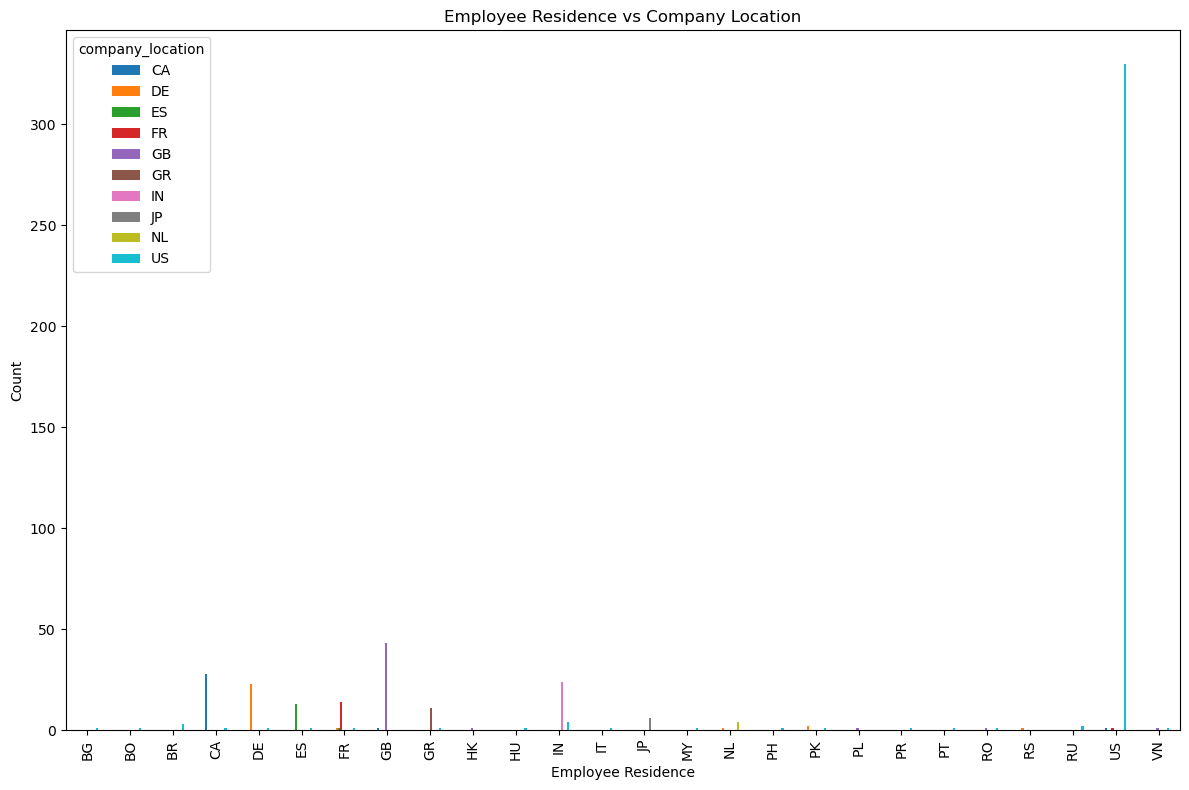

In [25]:
# Stacked bar plot
top_10_locations = df['company_location'].value_counts().nlargest(10).index
cross_tab = pd.crosstab(df[df['company_location'].isin(top_10_locations)]['employee_residence'], df[df['company_location'].isin(top_10_locations)]['company_location'])


# Grouped bar plot
cross_tab.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Employee Residence')
plt.ylabel('Count')
plt.title('Employee Residence vs Company Location')

# Adjust the x-axis tick labels to avoid overlap
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


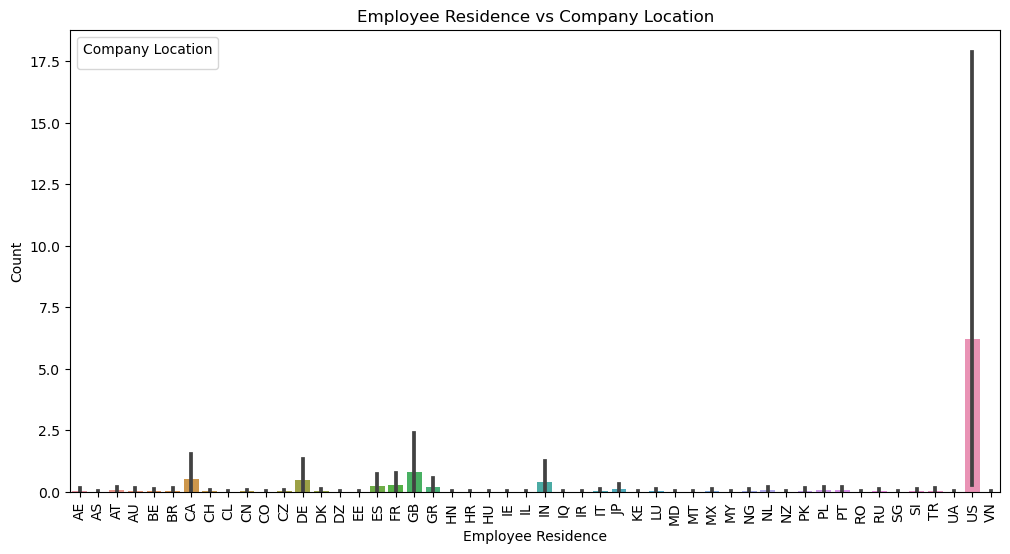

In [28]:
# Employee Residence vs Company Location

cross_tab = pd.crosstab(df['employee_residence'], df['company_location'])

# Converting cross_tab to a DataFrame
cross_tab_df = pd.DataFrame(cross_tab)

# Creating a \bar plot
plt.figure(figsize=(12, 6)) 
sns.barplot(data=cross_tab_df)
plt.xlabel('Employee Residence')
plt.ylabel('Count')
plt.title('Employee Residence vs Company Location')
plt.xticks(rotation=90)
plt.legend(title='Company Location')
plt.show()

M    326
L    198
S     83
Name: company_size, dtype: int64


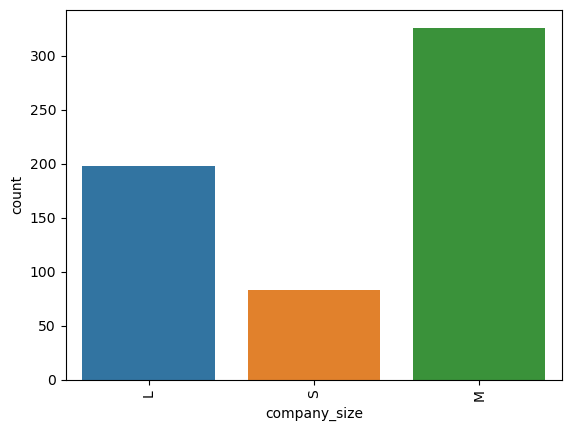

In [34]:
# Distribution of Company Size

print(df['company_size'].value_counts())
sns.countplot(data=df, x='company_size')
plt.xticks(rotation=90);

2022    318
2021    217
2020     72
Name: work_year, dtype: int64


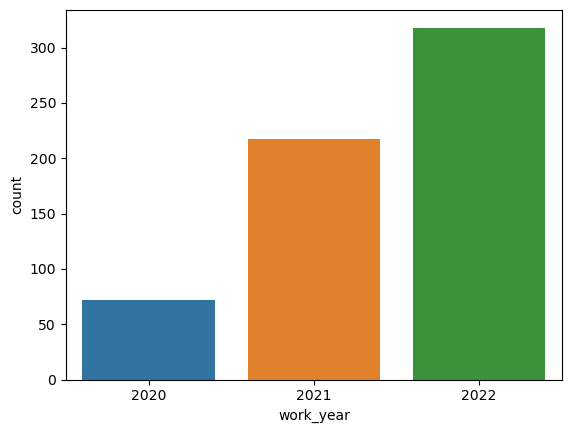

In [37]:
print(df['work_year'].value_counts())
sns.countplot(x='work_year', data=df);

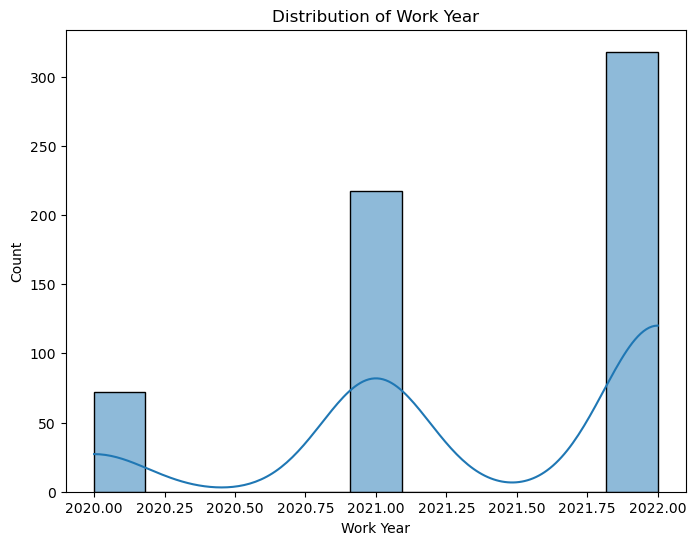

In [36]:
# Distribution of Work Year

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='work_year', bins='auto', kde=True)
plt.xlabel('Work Year')
plt.ylabel('Count')
plt.title('Distribution of Work Year')
plt.show()

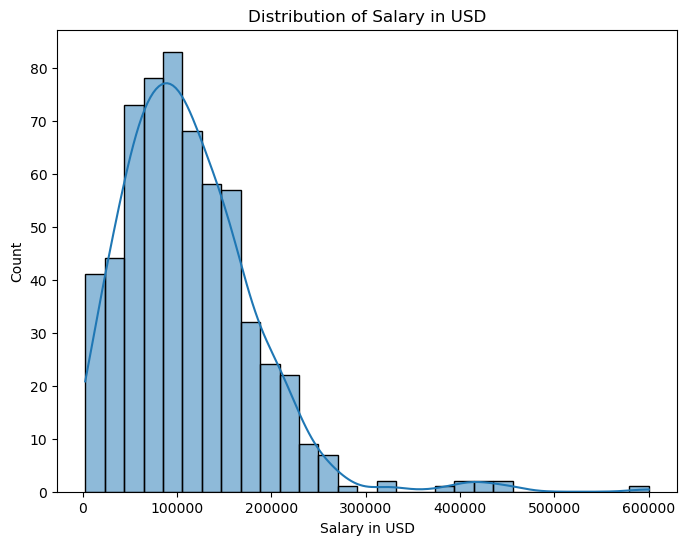

In [41]:
# Distribution of Salary in USD

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='salary_in_usd', bins='auto', kde=True)
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.title('Distribution of Salary in USD')
plt.show()

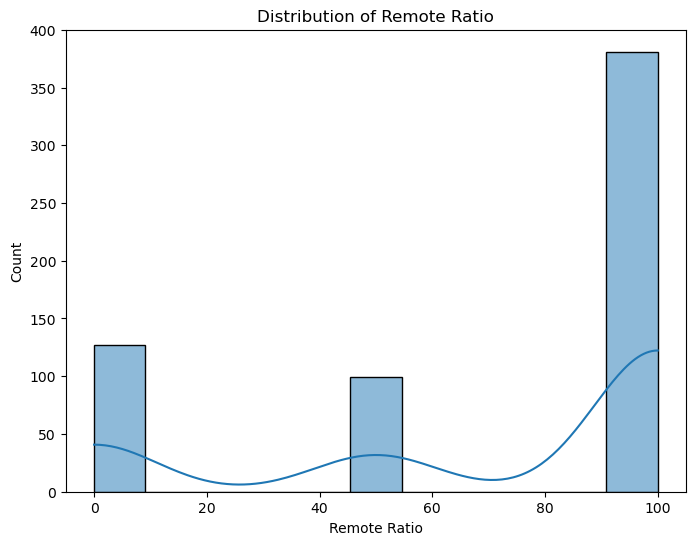

In [42]:
# Distribution of Remote Ratio

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='remote_ratio', bins='auto', kde=True)
plt.xlabel('Remote Ratio')
plt.ylabel('Count')
plt.title('Distribution of Remote Ratio')
plt.show();

### Bivariate Analysis
- Work Year Analysis

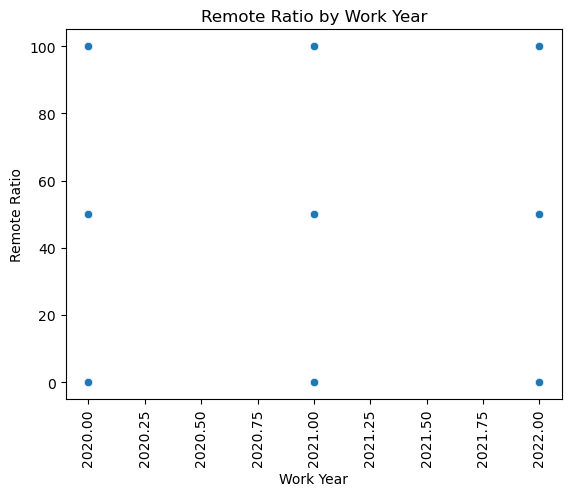

In [45]:
# Remote Ratio by Work Year

sns.scatterplot(data=df, x='work_year', y='remote_ratio')
plt.xlabel('Work Year')
plt.ylabel('Remote Ratio')
plt.title('Remote Ratio by Work Year')
plt.xticks(rotation=90)

plt.show()

## Experience Level Analysis

<Figure size 1000x600 with 0 Axes>

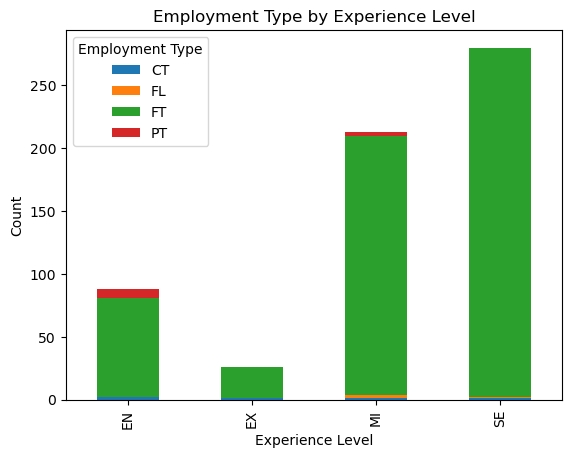

In [46]:
# Employment Type by Experience Level

plt.figure(figsize=(10, 6)) 

cross_tab = pd.crosstab(df['experience_level'], df['employment_type'])

# Plot a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Employment Type by Experience Level')
plt.legend(title='Employment Type')
plt.xticks(rotation=90)

plt.show()

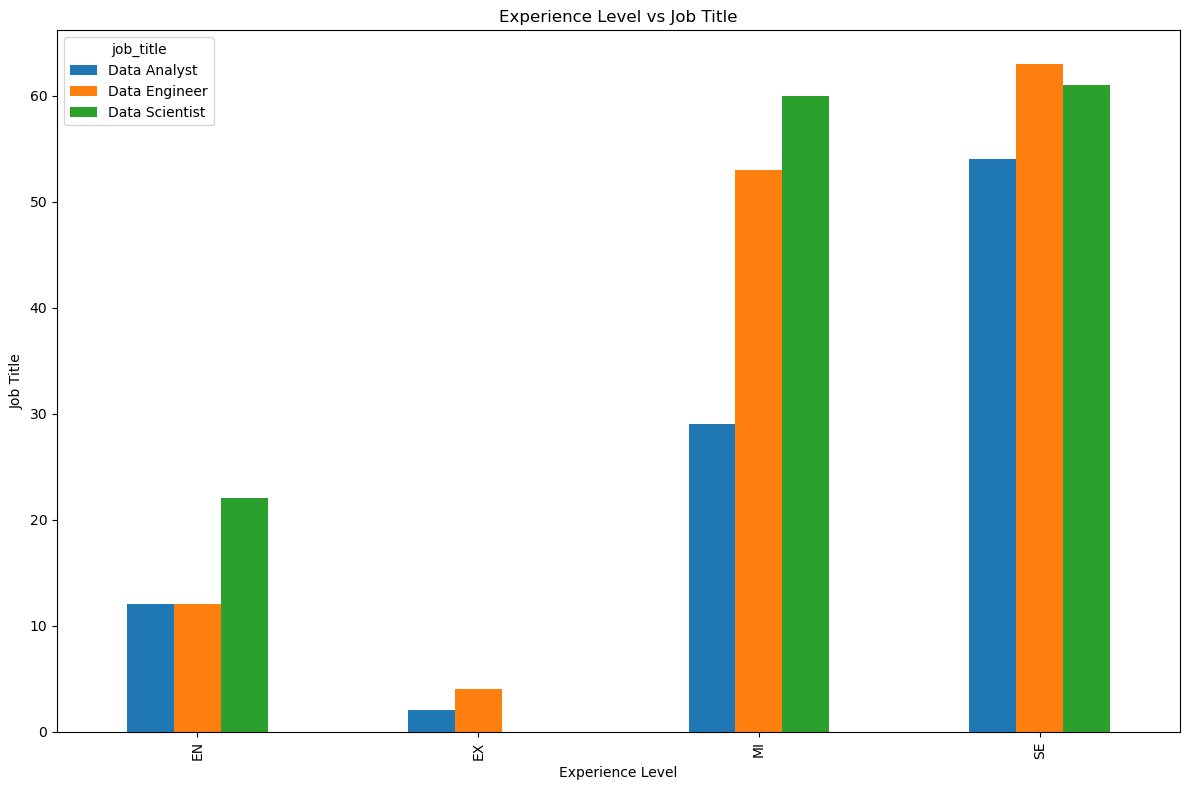

In [49]:
# Experience Level vs Job Title

top_job_titles = df['job_title'].value_counts().nlargest(3).index
cross_tab = pd.crosstab(df[df['job_title'].isin(top_job_titles)]['experience_level'], df[df['job_title'].isin(top_job_titles)]['job_title'])

#Plot a grouped bar plot
cross_tab.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Experience Level')
plt.ylabel('Job Title')
plt.title('Experience Level vs Job Title')

# Adjust the x-axis tick labels to avoid overlap
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

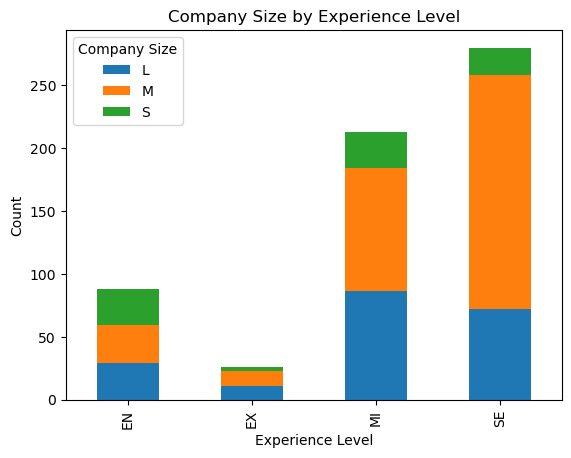

In [50]:
# Experience Level vs Job Title

plt.figure(figsize=(10, 6))  

cross_tab = pd.crosstab(df['experience_level'], df['company_size'])

# Plot a stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Experience Level vs Job Title')
plt.legend(title='Company Size')
plt.xticks(rotation=90)

plt.show()

## Salaries Analysis

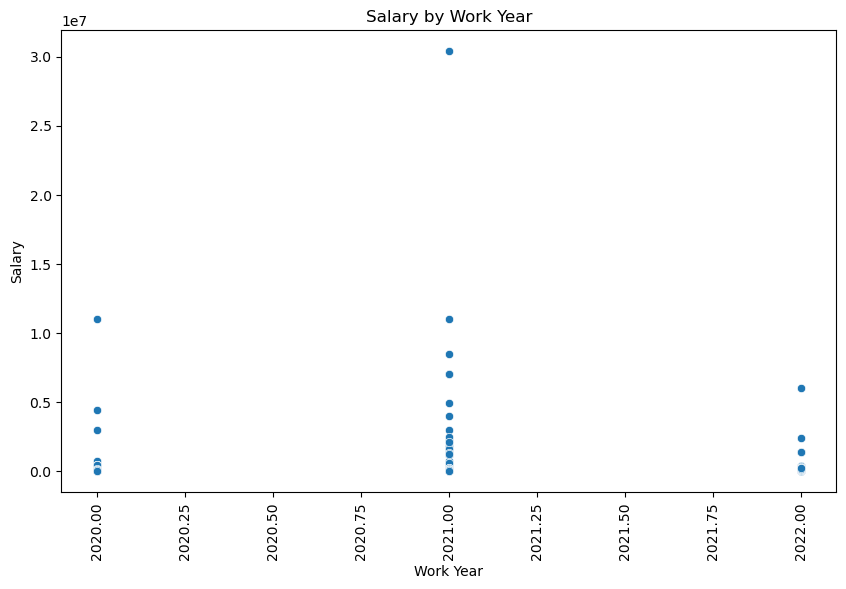

In [51]:
# Salary by Work Year

plt.figure(figsize=(10, 6))  

sns.scatterplot(data=df, x='work_year', y='salary')
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.title('Salary by Work Year')
plt.xticks(rotation=90)

plt.show()

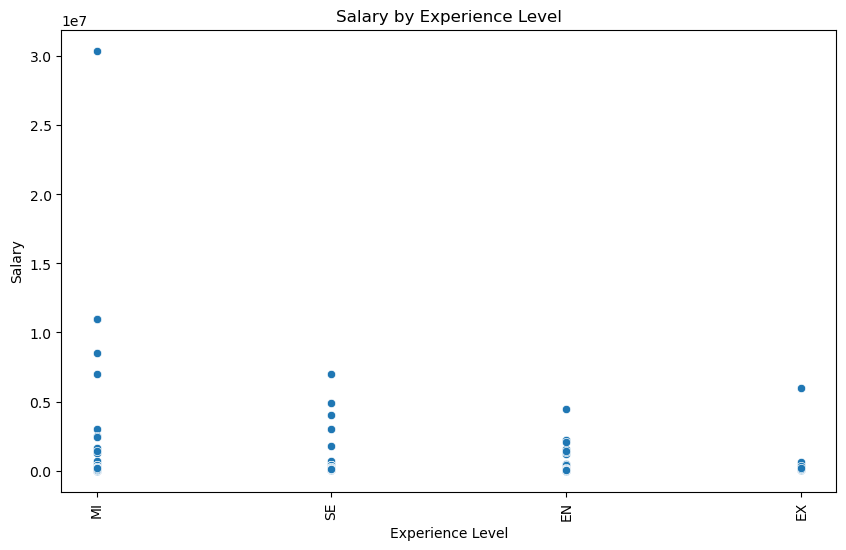

In [53]:
# Salary by Experience Level

plt.figure(figsize=(10, 6))  

sns.scatterplot(data=df, x='experience_level', y='salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Salary by Experience Level')
plt.xticks(rotation=90)

plt.show()

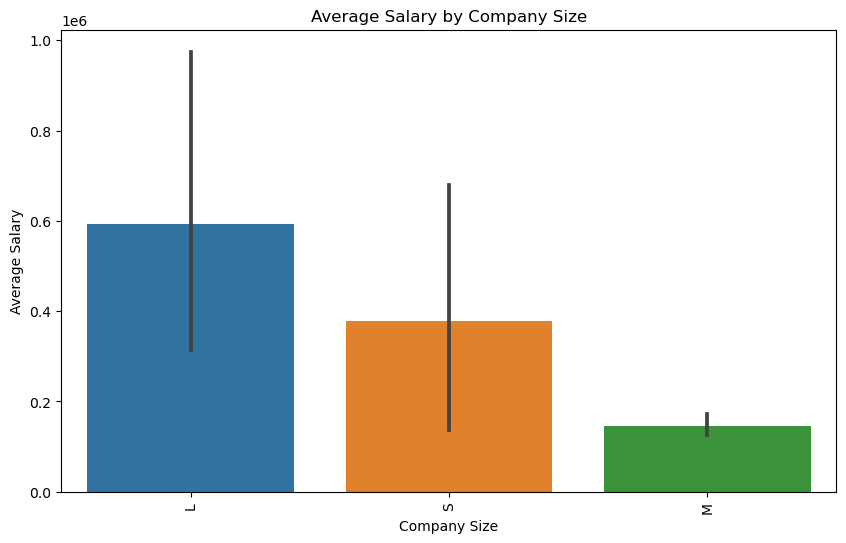

In [54]:
# Salary by Company Size

plt.figure(figsize=(10, 6)) 

sns.barplot(data=df, x='company_size', y='salary', estimator=np.mean)
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=90)

plt.show()

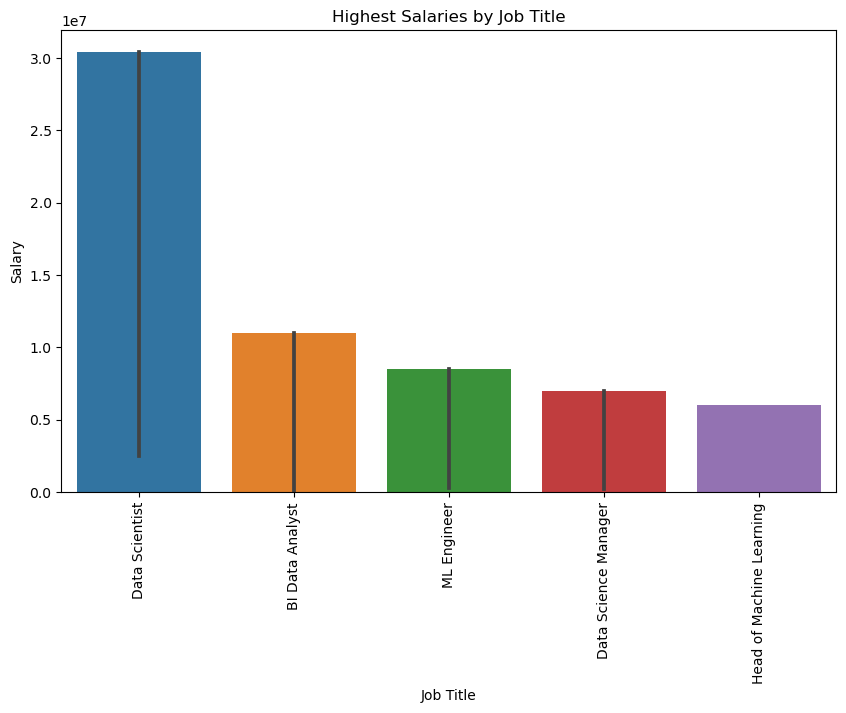

In [55]:
# Highest Salaries by Job Title

plt.figure(figsize=(10, 6))  

top_job_salaries = df.groupby('job_title')['salary'].max().nlargest(5)

# Plot a bar plot
sns.barplot(data=df[df['job_title'].isin(top_job_salaries.index)],
            x='job_title', y='salary', estimator=np.max)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Highest Salaries by Job Title')
plt.xticks(rotation=90)

plt.show()

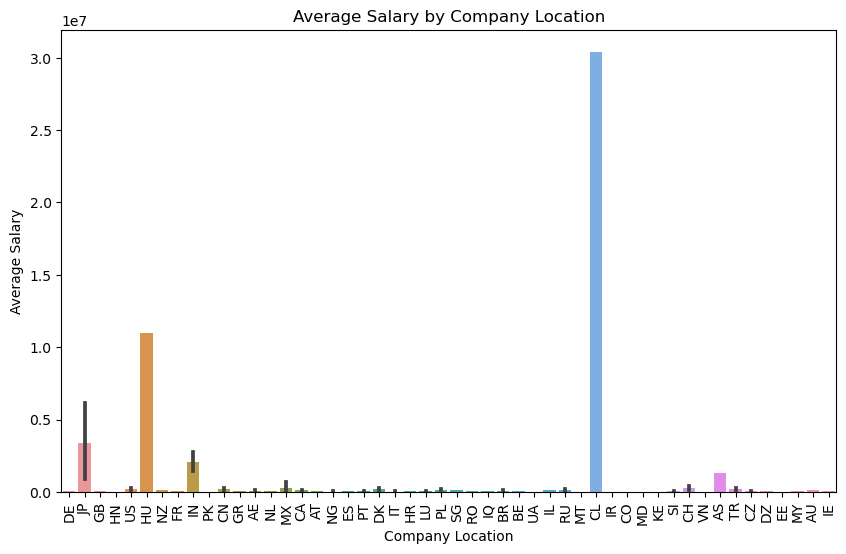

In [56]:
# Average Salaries by Company Location

plt.figure(figsize=(10, 6))  

sns.barplot(data=df, x='company_location', y='salary', estimator=np.mean)
plt.xlabel('Company Location')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Location')
plt.xticks(rotation=90)

plt.show()